<a href="https://colab.research.google.com/github/meryltheng/DeepLearningA-Z/blob/main/Mega_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [1]:
!pip install MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=5fef223b0efc668a2a406337e9004de645c108418559e215ace5d1d6639d0414
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built MiniSom


## Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [5]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


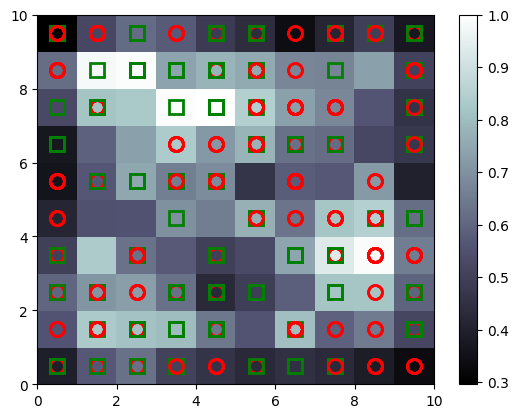

In [6]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [17]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,9)], mappings[(2,9)], mappings[(3,7)], mappings[(4,7)], mappings[(8,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [18]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15768295
15753550
15747757
15724851
15810485
15795690
15702149
15787229
15689786
15759133
15758477
15654859
15723827
15725028
15731989
15667460
15571121
15624595
15720644
15671987
15700511
15597709
15642934
15709252
15587266
15567860
15670646
15625311
15676156
15604130
15668889
15624423
15673238
15604196


#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [19]:
customers = dataset.iloc[:, 1:].values # all columns except first one ('CustmomerID')

## Create Dependent Variable

In [20]:
is_fraud = np.zeros(len(dataset)) # dependent variable; initialized with 0s
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds: # check if CustomerID is in the list of frauds
    is_fraud[i] = 1 # replace 0 by 1

#Part 3 - ANN

### Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [22]:
import tensorflow as tf
tf.__version__

'2.12.0'

## Initializing the ANN

In [23]:
ann = tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [24]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu')) 

## Adding the output layer

In [25]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [26]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

The dataset is so simple (ie., few observations and few features), it takes 1-2 epochs to be updated. 

In [27]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 2)

Epoch 1/2
690/690 [==============================] - 2s 2ms/step - loss: 0.7851 - accuracy: 0.6101
Epoch 2/2
690/690 [==============================] - 1s 2ms/step - loss: 0.4599 - accuracy: 0.9116


## Predicting the probabilities of fraud

In [30]:
y_pred = ann.predict(customers) # 2D array
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1) # 0:1 index and .values makes it a 2D np.array; horizontal concat, axis = 1
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 [==============================] - 0s 1ms/step
